# Data Analytics and Data Driven Decision - Final Project.

# Section 1: Description of the dataset

**Source**: [https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe)

**Why this dataset?** # TODO



####  Description about the contents
| **Column Name**                            	| **Data Type** 	| **Description**                                                                                                                                                	|
|--------------------------------------------	|---------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| Hotel_Address                              	| string        	| Address of hotel.                                                                                                                                              	|
| Review_Date                                	| string        	| Date when reviewer posted the corresponding review.                                                                                                            	|
| Average_Score                              	| float         	| Average Score of the hotel, calculated based on the latest comment in the last year.                                                                           	|
| Hotel_Name                                 	| string        	| Name of Hotel.                                                                                                                                                 	|
| Reviewer_Nationality                       	| string        	| Nationality of Reviewer.                                                                                                                                       	|
| Negative_Review                            	| string        	| Negative Review the reviewer gave to the hotel. If the reviewer does not  give the negative review, then it should be: 'No Negative'.                          	|
| Review_Total_Negative_Word_Counts          	| integer       	| Total number of words in the negative review.                                                                                                                  	|
| Positive_Review                            	| string        	| Positive Review the reviewer gave to the hotel. If the reviewer does not  give the negative review, then it should be: 'No Positive'.                          	|
| Review_Total_Positive_Word_Counts          	| integer       	| Total number of words in the positive review.                                                                                                                  	|
| Reviewer_Score                             	| float         	| Score the reviewer has given to the hotel, based on his/her experience.                                                                                        	|
| Total_Number_of_Reviews_Reviewer_Has_Given 	| integer       	| Number of Reviews the reviewers has given in the past.                                                                                                         	|
| Total_Number_of_Reviews                    	| integer       	| Total number of valid reviews the hotel has.                                                                                                                   	|
| Tags                                       	| string        	| Tags reviewer gave the hotel.                                                                                                                                  	|
| days_since_review                          	| string       	| Duration between the review date and scrape date.                                                                                                              	|
| Additional_Number_of_Scoring               	| integer       	| There are also some guests who just made a scoring on the service  rather than a review. This number indicates how many valid scores  without review in there. 	|
| lat                                        	| float         	| Latitude of the hotel.                                                                                                                                         	|
| lng                                        	| float         	| Longtitude of the hotel.                                                                                                                                       	|

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# With the following operation we set seaborn library as plotting library.
sns.set()
%matplotlib inline

FIG_SIZE = (10,8)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# We read the csv as DataFrame.
reviews_df = pd.read_csv('Hotel_Reviews.csv')
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
reviews_df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


# Section 2 : Data Cleaning

In [4]:
# We count the number of element in each column to check the presence of null variable.
reviews_df.count()

Hotel_Address                                 515738
Additional_Number_of_Scoring                  515738
Review_Date                                   515738
Average_Score                                 515738
Hotel_Name                                    515738
Reviewer_Nationality                          515738
Negative_Review                               515738
Review_Total_Negative_Word_Counts             515738
Total_Number_of_Reviews                       515738
Positive_Review                               515738
Review_Total_Positive_Word_Counts             515738
Total_Number_of_Reviews_Reviewer_Has_Given    515738
Reviewer_Score                                515738
Tags                                          515738
days_since_review                             515738
lat                                           512470
lng                                           512470
dtype: int64

One of the first thing we've noticed is that some row doesn't have latitude and longitude attributes. First we check that the latitude and longitude attribute are null for each row of the dataframe that refers to this specific hotel. In this way we can be certain that we are missing the coordinates of this hotel for every review's instance (not only for a few of them).

In [5]:
reviews_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                            True
lng                                            True
dtype: bool

In [6]:
# Here we get the list of hotel names with null 'lat'.
missing_lat_hotels = reviews_df[reviews_df['lat'].isnull()]['Hotel_Name'].unique()
missing_lat_hotels

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [7]:
# Here we check that we don't have the 'lat' for this hotel in none of the row entry associated to it.
for hotel in range(len(missing_lat_hotels)):
    assert reviews_df[reviews_df['Hotel_Name'] == missing_lat_hotels[hotel]]['lat'].isnull().all() == True

In [8]:
# Here we get the list of hotel names with null 'lng'.
missing_lng_hotels = reviews_df[reviews_df['lng'].isnull()]['Hotel_Name'].unique()
missing_lng_hotels

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [9]:
# Here we check that we don't have the 'lng' for this hotel in none of the row entry associated to it.
for hotel in range(len(missing_lng_hotels)):
    assert reviews_df[reviews_df['Hotel_Name'] == missing_lng_hotels[hotel]]['lat'].isnull().all() == True

We fill the empty cells by searching online the geospatial coordinates associated to each one of the hotels. Then we store these information info our dataframe and we check again that now it is full with all its information.

In [10]:
missing_infos = {'Fleming s Selection Hotel Wien City': {'lat':48.209270, 'lng':16.353479},
    'Hotel City Central':{'lat':48.2136,'lng':16.3799},
    'Hotel Atlanta':{'lat':48.210033,'lng':16.363449},
    'Maison Albar Hotel Paris Op ra Diamond':{'lat':48.875343,'lng':2.323358},
    'Hotel Daniel Vienna':{'lat':48.1888,'lng':16.3840},
    'Hotel Pension Baron am Schottentor':{'lat':48.216701,'lng':16.359819},
    'Austria Trend Hotel Schloss Wilhelminenberg Wien':{'lat':48.2195,'lng':16.2856},
    'Derag Livinghotel Kaiser Franz Joseph Vienna':{'lat':48.245998,'lng':16.341080},
    'NH Collection Barcelona Podium':{'lat':41.3916,'lng':2.1779},
    'City Hotel Deutschmeister':{'lat':48.22088,'lng':16.36663},
    'Hotel Park Villa':{'lat':48.233577,'lng':16.345682},
    'Cordial Theaterhotel Wien':{'lat':48.209488,'lng':16.351585},
    'Holiday Inn Paris Montmartre':{'lat':48.888920,'lng':2.333087},
    'Roomz Vienna':{'lat':48.186605,'lng':16.420643},
    'Mercure Paris Gare Montparnasse':{'lat':48.840012,'lng':2.323595},
    'Renaissance Barcelona Hotel':{'lat':41.392673,'lng':2.167494},
    'Hotel Advance': {'lat':41.383308,'lng':2.162828}
}

In [11]:
nan_df = reviews_df[reviews_df.isnull().any(axis=1)]

for index, row in nan_df.iterrows():
    reviews_df.at[index, 'lat'] = missing_infos[row['Hotel_Name']]['lat']
    reviews_df.at[index, 'lng'] = missing_infos[row['Hotel_Name']]['lng']

In [12]:
reviews_df.count()

Hotel_Address                                 515738
Additional_Number_of_Scoring                  515738
Review_Date                                   515738
Average_Score                                 515738
Hotel_Name                                    515738
Reviewer_Nationality                          515738
Negative_Review                               515738
Review_Total_Negative_Word_Counts             515738
Total_Number_of_Reviews                       515738
Positive_Review                               515738
Review_Total_Positive_Word_Counts             515738
Total_Number_of_Reviews_Reviewer_Has_Given    515738
Reviewer_Score                                515738
Tags                                          515738
days_since_review                             515738
lat                                           515738
lng                                           515738
dtype: int64

In [13]:
reviews_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                           False
lng                                           False
dtype: bool

In order to perform some exploratory data analysis operations in the following section, we've had the need to classify the hotel based on the country in which they are located and also to classify the country either in one with sea nearby or in one without sea. We have created ad-hoc columns to represent this information for each row of the dataset.

In [14]:
# The countries are: ['Netherlands', 'Kingdom', 'France', 'Spain', 'Italy', 'Austria'].
cold_countries = ['Netherlands', 'Kingdom', 'Austria']
hot_countries = ['France', 'Italy', 'Spain']

has_sea = ['Spain', 'Kingdom', 'Netherlands']
does_not_sea = ['Italy', 'Austria', 'France' ]

In [15]:
# 'Hotel_Country' is for the name of the country in which the hotel is located.
reviews_df['Hotel_Country'] = ""

# 'Country_Type' has value equals to 1 if the hotel has sea nearby, 0 otherwise.
reviews_df['Country_Type'] = ""

for index, row in reviews_df.iterrows():
    country_name = row.Hotel_Address.split()[-1]
    reviews_df.at[index,'Hotel_Country'] = country_name
    if country_name in does_not_sea:
        reviews_df.at[index,'Country_Type'] = 0
    elif country_name in has_sea:
        reviews_df.at[index,'Country_Type'] = 1    

In [16]:
# We check that the dataset hasn't row with 'Country_Type' equals to empty string.
reviews_df[reviews_df['Country_Type'] == ""].count()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
Hotel_Country                                 0
Country_Type                                  0
dtype: int64

In [17]:
reviews_df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Country_Type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,1


The *'Review_Date'* column has date in string format, we have transformed them in DateTime object so that we can better manipulate them.

In [18]:
# Convert date type from string to datetime.
reviews_df['Review_Date'] = pd.to_datetime(reviews_df['Review_Date'], format='%m/%d/%Y')

The *'days_since_review'* column has the information is string format with an additional string "days" that for us is useless (for example "10 days"). In the following cell we extract the number from the string and update the value of the cell.

In [19]:
# Delete "days" word from 'days_since_review' column.
cleaned_days = reviews_df['days_since_review'].str.extract('(\d+)').astype('int32')
reviews_df['days_since_review'] = cleaned_days

The *'Reviewer_Nationality'* columns has one whitespace at the beginning and one at the end of the value. We have removed them.

In [20]:
# Remove white spaces at the beginning and end of reviewer nationality fields.
cleaned_nat = [str(row).strip() for row in reviews_df['Reviewer_Nationality']]
reviews_df['Reviewer_Nationality'] = cleaned_nat

Now that the dataset has been cleaned, we can save it so that next time we load the new formatted version.

In [21]:
reviews_df.to_csv('Cleaned_Hotel_Reviews.csv', index=False)

In [22]:
# reviews_df = pd.read_csv('Cleaned_Hotel_Reviews.csv',index_col=[0])
# reviews_df.index.name = 'Index'

In [23]:
dataframe_length = reviews_df['Hotel_Name'].count()
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Country_Type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,Netherlands,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,Netherlands,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968,Netherlands,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968,Netherlands,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968,Netherlands,1


# Section 3: Exploratory Analysis
In this section we explore our data, we've organized our exploration as Question/Answer where the question is given in a non-technical way and the answer is obtained by investigating our dataset.

#### Question: How many hotels do we have in the dataset? 
#### Question: What is the hotel with most reviews?

In [24]:
reviews_df['Hotel_Name'].describe()

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

We have 1492 different hotels in the dataset and the most frequent one (i.e. the one for which we have the major number of reviews) is the **Britannia International Hotel Canary Wharf** with 4789 reviews.

#### Question:  How many reviews do we have for each one of the reviewed hotels? 

In [25]:
# with .value_counts() we count the number of occurencies for each one of the used values.
reviews_df['Hotel_Name'].value_counts().head(20)

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St James Court

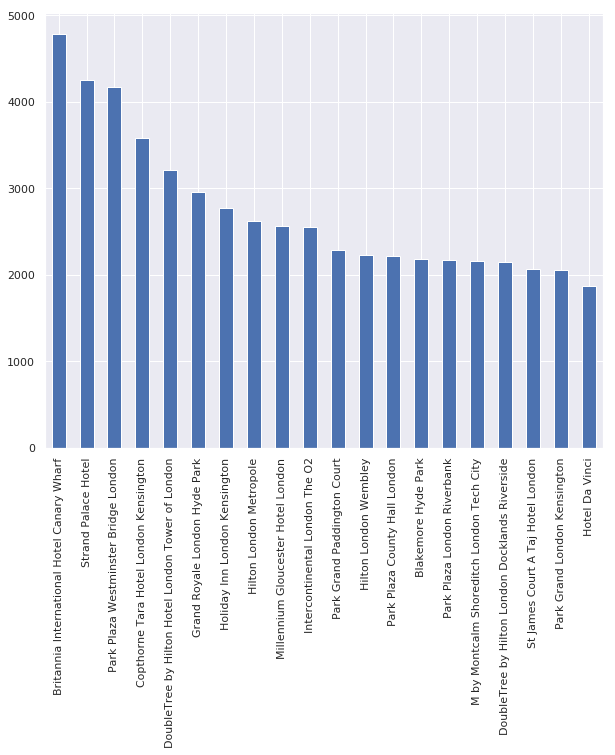

In [26]:
reviews_df['Hotel_Name'].value_counts().head(20).plot(kind='bar',figsize=FIG_SIZE)

#### Question: What is the time range of these reviews? 

In [27]:
reviews_df['Review_Date'].min().strftime('%m-%d-%Y')

'08-04-2015'

In [28]:
reviews_df['Review_Date'].max().strftime('%m-%d-%Y')

'08-03-2017'

#### Question: Which are the most frequent days for reviewers?

In [29]:
reviews_df['Review_Date'].value_counts().head(10)

2017-08-02    2585
2016-09-15    2308
2017-04-05    2284
2016-08-30    1963
2016-02-16    1940
2016-07-05    1904
2016-05-31    1860
2016-12-05    1803
2016-07-12    1801
2016-08-02    1783
Name: Review_Date, dtype: int64

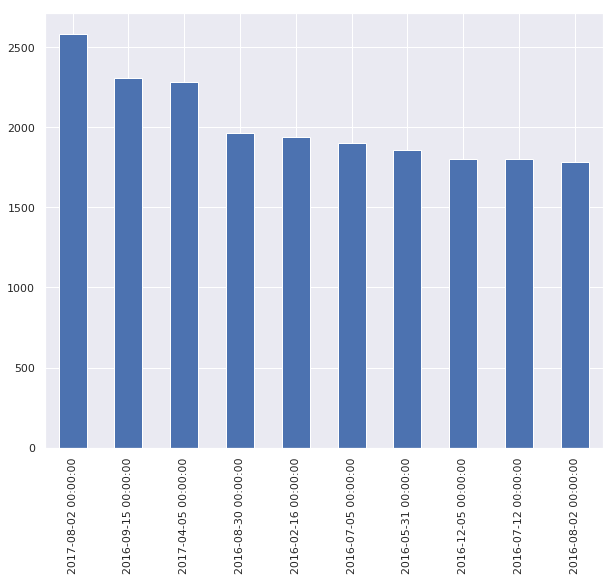

In [30]:
reviews_df['Review_Date'].value_counts().head(10).plot(kind='bar', figsize=FIG_SIZE)

#### Question: How is the number of reviews spread across time?

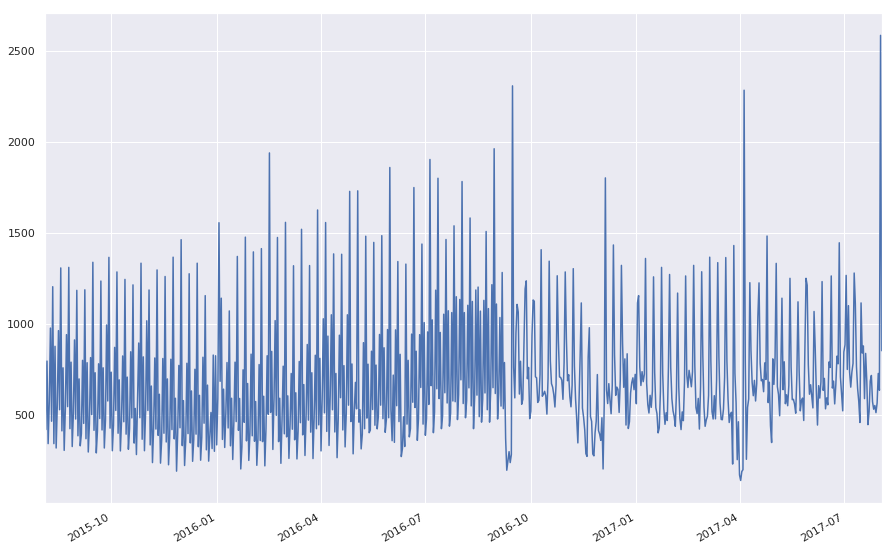

In [31]:
reviews_df['Review_Date'].value_counts().plot(figsize=(15,10))

#### Question: What is the date in which the data has been scraped?

In [32]:
reviews_df.query('days_since_review == 0').iloc[0]['Review_Date'].strftime('%m-%d-%Y')

'08-03-2017'

#### Question: How are the average scores distributed?

In [33]:
reviews_df['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

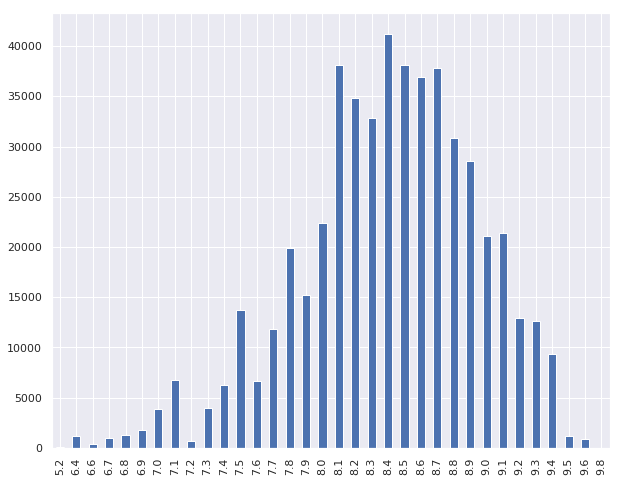

In [34]:
reviews_df['Average_Score'].value_counts().sort_index().plot(kind='bar',figsize=FIG_SIZE)

We see that most of the hotels' reviewer scores lie between an average score of 8.0 and 9.0.

In [35]:
# We count how many reviews are in the range [8.0,9.0].
t = reviews_df['Average_Score'].value_counts().sort_index()[8.0 : 9.0].sum()
t

362629

In [36]:
percentage = t / reviews_df['Average_Score'].count() * 100
print("In this range of score fall the {:.2f}% of the reviews.".format(percentage))

In this range of score fall the 70.31% of the reviews.


#### Question: How is the nationality of the reviewers distribitued?

In [37]:
reviews_df['Reviewer_Nationality'].value_counts().head(10)

United Kingdom              245246
United States of America     35437
Australia                    21686
Ireland                      14827
United Arab Emirates         10235
Saudi Arabia                  8951
Netherlands                   8772
Switzerland                   8678
Germany                       7941
Canada                        7894
Name: Reviewer_Nationality, dtype: int64

We've noticed that a lot of the reviews are from United Kingdom people.

In [38]:
reviews_df['Reviewer_Nationality'].value_counts().iloc[0] / dataframe_length * 100

47.55243941691324

#### Question: How many reviews are from italian people?

In [39]:
reviews_df['Reviewer_Nationality'].value_counts()['Italy']

6114

#### Question: How is the number of reviews made by the reviewers distributed?

In [40]:
reviews_df['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().head(10)

1     154640
2      67077
3      46845
4      35026
5      27629
6      22621
7      18614
8      16150
9      13545
10     11717
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: int64

We see that there are 154640 reviews given by people that have given only 1 review, this means that it's their first one.

In [41]:
percentage = reviews_df['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().iloc[0]
print("The percentage of first review in the dataframe is {:.2f}%".format(percentage / dataframe_length * 100))

The percentage of first review in the dataframe is 29.98%


#### Question: Where are the reviewed hotels located?

In [42]:
reviews_df['Hotel_Country'].describe()

count      515738
unique          6
top       Kingdom
freq       262301
Name: Hotel_Country, dtype: object

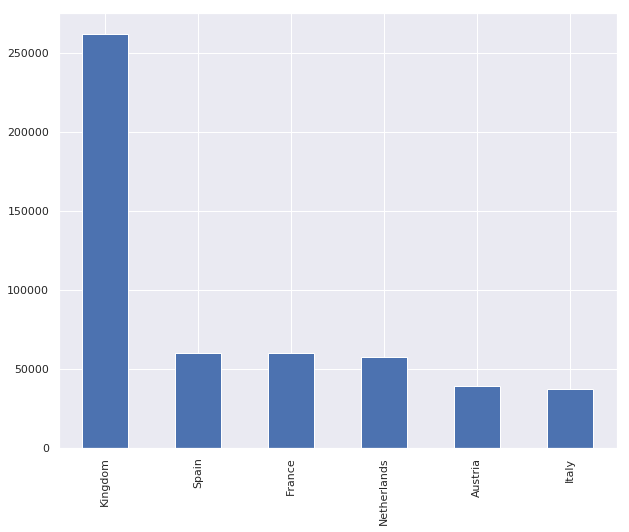

In [43]:
reviews_df['Hotel_Country'].value_counts().head(10).plot(kind='bar', figsize=FIG_SIZE)

#### Question: Can we infer something from the location of the hotels and the period in which the reviews were made? For example does the amount of reviews during summer for sea-side hotels increase?

In [44]:
reviews_df['count'] = 0
df = reviews_df['count'].groupby([reviews_df['Country_Type'],reviews_df['Review_Date'].dt.strftime('%m'),reviews_df['Review_Date'].dt.strftime('%Y')]).count()

In [45]:
df.head()

Country_Type  Review_Date  Review_Date
0             01           2016           4737
                           2017           5440
              02           2016           3989
                           2017           4231
              03           2016           4712
Name: count, dtype: int64

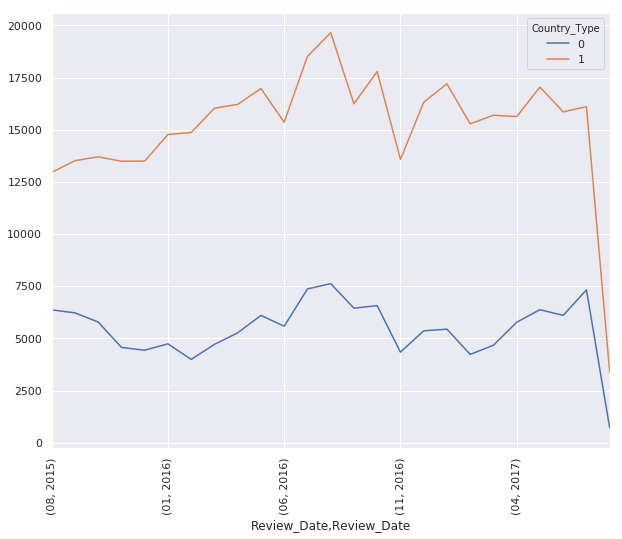

In [46]:
df.unstack(level=0).sort_index(level=[1,0]).plot(figsize=FIG_SIZE, rot=90)

We can't infer much from this plot because the red line (the one that contains the reviews for UK hotels) has much more reviews with respect to the other. So in the following cell we work only on the subset of reviews that are related to all the other hotels, except to those in UK.

In [47]:
# We remove all reviews from UK.
no_uk = reviews_df.query('Hotel_Country != "Kingdom"')
no_uk['count'] = ""
df = no_uk['count'].groupby([no_uk['Country_Type'],no_uk['Review_Date'].dt.strftime('%m'),no_uk['Review_Date'].dt.strftime('%Y')]).count()
df.head()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Country_Type  Review_Date  Review_Date
0             01           2016           4737
                           2017           5440
              02           2016           3989
                           2017           4231
              03           2016           4712
Name: count, dtype: int64

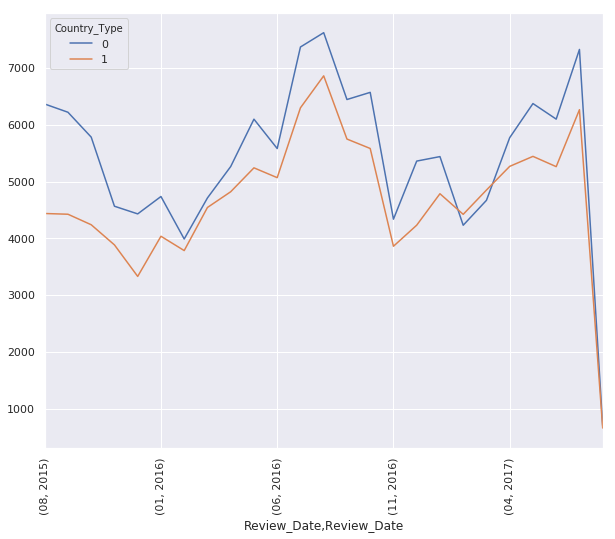

In [48]:
df.unstack(level=0).sort_index(level=[1,0]).plot(figsize=FIG_SIZE, rot=90)
# Country type = 1 means the hotel is near sea.

We thought that during summer periods, the number of reviews left to hotel near the sea would have be bigger that the ones left to those hotels located in countries without seaside. But, as stated by the previous plot, this is not true.

#### Is the review score affected by the nights spent in the hotel?

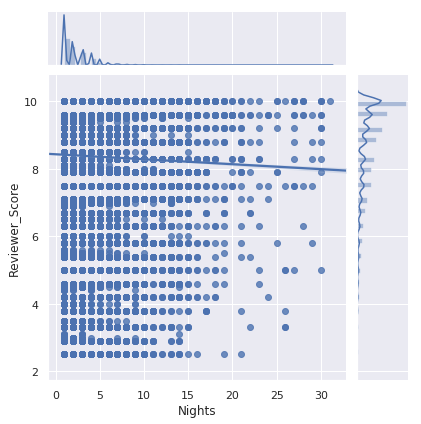

In [49]:
def splitString(string):
    array = string.split(" ', ' ")
    array[0] = array[0][3:]
    array[-1] = array[-1][:-3]
    if not 'trip' in array[0]:
        array.insert(0,None)
    try:
        return float(array[3].split()[1])
    except:
        return None

reviews_df["Nights"] = reviews_df["Tags"].apply(splitString)
sns.jointplot(data=reviews_df,y="Reviewer_Score",x="Nights",kind="reg")

#### Question: Which are the most used tags in the reviews?

In [50]:
# 'Tag' column has an array formatted as string, so we've used Regex to fetch the contents.
tag = pd.Series(re.findall(r'[\']\s([\w\s]+)\s[\']',''.join(reviews_df.Tags))).value_counts()
tag.head()

Leisure trip                      417778
Submitted from a mobile device    307640
Couple                            252294
Stayed 1 night                    193645
Stayed 2 nights                   133937
dtype: int64

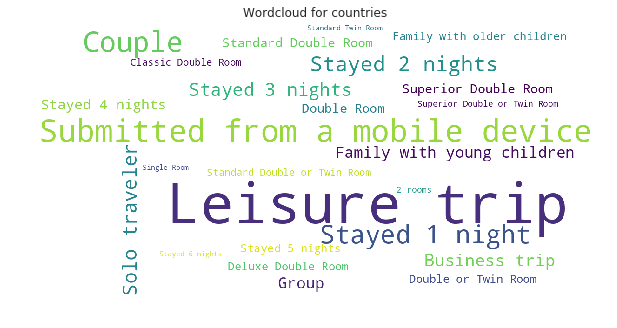

In [51]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_frequencies(tag)
wordcloud.recolor(random_state=1)
plt.figure(1, figsize=FIG_SIZE)
plt.imshow(wordcloud)
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

As we can see, most of the reviews are related to leisure trip which is the biggest word in the wordcloud. 'Couple' is bigger that 'Solo traveler' this means that there are more trip done in 2 with respect to the ones done alone.
Interestingly the tag 'Submitted from a mobile devide' is big, in the next quesiton we'll get the number and percentage of reviews submitted by smartphone. This is important expecially for booking sites, to encourgae them to have a nice and user-friendly app. Other thing to notice is that the longer the trip is, the smaller the tag 'Stayed x night' is.

#### Question: How many reviews were posted by smartphone application?

In [52]:
tag['Submitted from a mobile device']

307640

In [53]:
print("The {:.2f}% of the total number.".format(tag['Submitted from a mobile device'] / dataframe_length * 100))

The 59.65% of the total number.


#### Question: Where are the hotels located?

In [54]:
choords = reviews_df.drop_duplicates(subset=['Hotel_Name'])

In [55]:
import folium as f
from folium.plugins import MarkerCluster

m = f.Map(location=[choords['lat'].mean(), choords['lng'].mean()], zoom_start=5)

In [56]:
mc = MarkerCluster()

for index, row in choords.iterrows():
    mc.add_child(f.Marker(location=[row["lat"], row["lng"]],popup='<i>{}</i>'.format(row['Hotel_Name'])))

m.add_child(mc)
m

#### Question: How many positive reviews there are in dataset?


#### Answer: 
In order to answer this question we need to use the data contained in the column **Review_Total_Positive_Word_Counts**, when the value is equals to *zero* it means this is **not** a positive review.

In [57]:
reviews_df['Review_Total_Positive_Word_Counts'].value_counts().head()

0    35946
6    26921
5    26844
4    24656
7    24538
Name: Review_Total_Positive_Word_Counts, dtype: int64

We have 35946 reviews with positive words count equal to zero, this means that they are **completely negative** reviews.

In [58]:
df = reviews_df.query('Review_Total_Positive_Word_Counts == 0')[['Negative_Review', 'Positive_Review']]
df.head()

,Negative_Review,Positive_Review
8,Even though the pictures show very clean room...,No Positive
32,Our bathroom had an urine order Shower was ve...,No Positive
98,Got charged 50 for a birthday package when it...,No Positive
121,The first room had steep steps to a loft bed ...,No Positive
134,Foyer was a mess Only place to relax was the ...,No Positive


So, in order to find the number of positive reviews we need to compute the number of rows with **Review_Total_Negative_Word_Counts** equals to zero.

In [59]:
reviews_df['Review_Total_Negative_Word_Counts'].value_counts().head()

0    127890
2     24647
3     18144
6     17749
5     16809
Name: Review_Total_Negative_Word_Counts, dtype: int64

Their number is 127890 but at this point we've found a problem. If we have 127890 positive reviews and 35946 negative in total we should have 127890 + 35946 = 163836 reviews but we know that our dataset has much more rows (515738). Clearly not all the reviews in the dataset have either the *'Negative_Review'* or the *'Positive_Review'* empty, but the fact that only 163836 out of 515738 have is strange.
In the following cells we try to investigate this problem.

In [60]:
reviews_df.query('Review_Total_Negative_Word_Counts == 1')[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts


There are no rows with only 1 word in it.

In [61]:
reviews_df.query('Review_Total_Negative_Word_Counts == 2').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
288,Nothing,2
308,Construction,2
530,Nothing,2
574,Nothing,2
606,nothing,2


This is the first problem that we've found, there are reviews with **Negative_Review** = "Nothing" or "nothing" that should be classified as positive but, given the fact that they have **Review_Total_Negative_Word_Counts** == 2 they are not. Another fact that arises is that we have count of words equal to 2 but the word is only one ("nothing" or "Nothing"). This probably means that there are whitespaces counted as word.

In [62]:
reviews_df.query('Review_Total_Negative_Word_Counts == 3').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
24,Nothing,3
228,n a,3
263,Loud aircondition,3
268,Nothing,3
283,Nothing,3


Also when the count is 3 we have the problem described above. We have also the "n a" negative review that should be classified in a positive review.

In [63]:
reviews_df.query('Review_Total_Negative_Word_Counts == 4').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
33,Please see above,4
231,No bad experiences,4
258,Unusual room layout,4
291,Breakfast poor,4
326,Service in reataurant,4


"No bad experiences" is another keyword that we should use for classifying the reviews.

In [64]:
reviews_df.query('Review_Total_Negative_Word_Counts == 5').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

,Negative_Review,Review_Total_Negative_Word_Counts
10,Nothing all great,5
52,I loved everything,5
272,check in time 3pm,5
293,Nothing it was perfect,5
295,Hotel under renovation,5


"Nothing all great" and "Nothing it was perfect" are other sentences that sould be used for classifying the reviews. The creatore of dateset supposed that when *'Review_Total_Negative_Word_Counts'* was equals to zero, the review was positive. But, as we've showed, this is not true because there are different rows with inconsistent data, suck as "nothing", "Nothing", "n a", all of them could be found in the dataset with whitespace/s.
From this problem we can deduce that we can't used the word count for computing neither the *completely* negative nor the *completely* positive.

In [65]:
# We've removed the whitespaces in the fields 'Negative_Review' and 'Positive_Review'.
reviews_df['Negative_Review'] = [x.lower().strip() for x in reviews_df['Negative_Review']]
reviews_df['Positive_Review'] = [x.lower().strip() for x in reviews_df['Positive_Review']]

reviews_df[['Negative_Review','Positive_Review']].head()

,Negative_Review,Positive_Review
0,i am so angry that i made this post available ...,only the park outside of the hotel was beautiful
1,no negative,no real complaints the hotel was great great l...
2,rooms are nice but for elderly a bit difficult...,location was good and staff were ok it is cute...
3,my room was dirty and i was afraid to walk bar...,great location in nice surroundings the bar an...
4,you when i booked with your company on line yo...,amazing location and building romantic setting


Given the previously mentioned problems, we've decided to classify the reviews in positive and negative ones by using the **Reviewer_Score** field availabled for each review. This score has a value between 0 (really bad) and 10 (really good), we set the boundaries of the bad reviews for the interval \[0 ,5\] and for the good ones to (5,10]. 

In [66]:
reviews_df.query('Reviewer_Score <= 5').head()[['Negative_Review', 'Positive_Review']]

,Negative_Review,Positive_Review
0,i am so angry that i made this post available ...,only the park outside of the hotel was beautiful
3,my room was dirty and i was afraid to walk bar...,great location in nice surroundings the bar an...
6,cleaner did not change our sheet and duvet eve...,the room is spacious and bright the hotel is l...
12,the floor in my room was filfy dirty very basi...,comfy bed good location
21,our room was an overrated disaster room 231 di...,the breakfast was the only positive element of...


In [67]:
# We create 2 columns for the 'classification'.
reviews_df['Is_Positive'] = 0
reviews_df['Is_Negative'] = 0

reviews_df['Is_Positive'] =  reviews_df['Reviewer_Score'].apply(lambda value: 1 if value>5 else 0)
reviews_df['Is_Negative'] =  reviews_df['Reviewer_Score'].apply(lambda value: 1 if value<=5 else 0)

reviews_df.head()[['Positive_Review','Negative_Review','Is_Positive','Is_Negative','Reviewer_Score']]

,Positive_Review,Negative_Review,Is_Positive,Is_Negative,Reviewer_Score
0,only the park outside of the hotel was beautiful,i am so angry that i made this post available ...,0,1,2.9
1,no real complaints the hotel was great great l...,no negative,1,0,7.5
2,location was good and staff were ok it is cute...,rooms are nice but for elderly a bit difficult...,1,0,7.1
3,great location in nice surroundings the bar an...,my room was dirty and i was afraid to walk bar...,0,1,3.8
4,amazing location and building romantic setting,you when i booked with your company on line yo...,1,0,6.7


In [68]:
# We check that each row has been classified.
dataframe_length == reviews_df['Is_Positive'].sum() + reviews_df['Is_Negative'].sum()

True

#### Question: Which is the hotel with the most number of negative reviews?

In [69]:
df = reviews_df.groupby(['Hotel_Name'])['Is_Positive','Is_Negative'].sum()
df.sort_values(by=['Is_Negative'],ascending=False).head()

,Is_Positive,Is_Negative
Hotel_Name,,
Britannia International Hotel Canary Wharf,3668,1121
Hilton London Metropole,2170,458
Grand Royale London Hyde Park,2587,371
Bloomsbury Palace Hotel,971,302
Millennium Gloucester Hotel London,2268,297


#### Question: How are positive and negative reviews distributed among hotels?

In [70]:
df['Sum'] = df.sum(axis=1,numeric_only=True)
df = df.sort_values(by='Sum',ascending=False)
df.drop('Sum',inplace=True,axis=1)

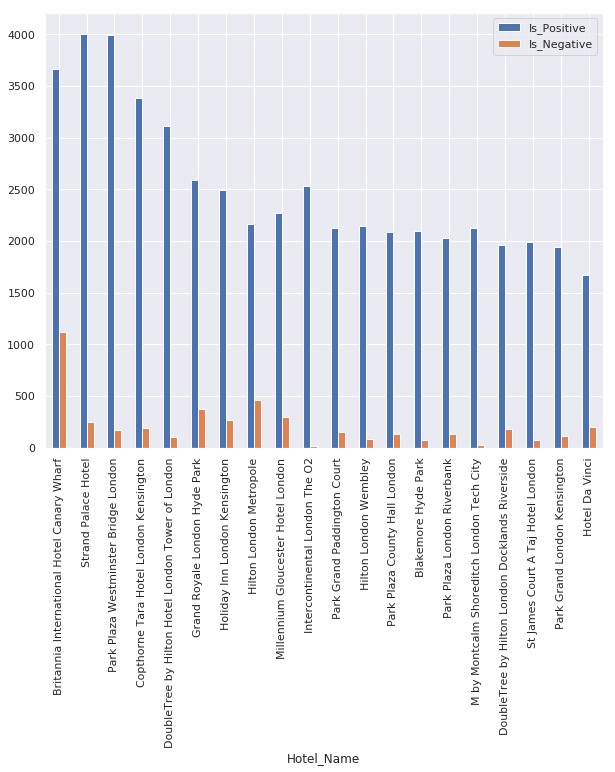

In [71]:
df.head(20).plot(kind='bar',figsize=FIG_SIZE)

# Section 4: NLP

https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

## TODO Aggiungere info su NLP.
In this section we focus our attention on the text field present in the dataset, in particular on the columns *'Positive_Review'* and *'Negative_Review'*.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import string

from nltk.corpus import wordnet    
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

The first thing we do is create a new pandas Dataframe composed of two columns, one is *'Text'* that is made by the concatenation of both the *'Positive_Review'* and *'Negative_Review'* fields, and the other is *'Is_Positive'*.

In [74]:
reviews_df['Text'] = reviews_df['Positive_Review'] + " " + reviews_df['Negative_Review']
text_df = reviews_df[['Text','Is_Positive']].copy()
text_df.head()

,Text,Is_Positive
0,only the park outside of the hotel was beautif...,0
1,no real complaints the hotel was great great l...,1
2,location was good and staff were ok it is cute...,1
3,great location in nice surroundings the bar an...,0
4,amazing location and building romantic setting...,1


The text of the column *'Text'* has to be cleaned, we need to remove puncutation, number and most important the **stopwords** in the sentences. Then we lemmatize each word, meaning that we extract form a word it's meaning. We store the result of this operation in a new column called *'Clean_Text'*.

In [75]:
# Clean the sentences, this operation is slow and cpu-intensive.

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
stop = set(stopwords.words('english'))

def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation.
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers.
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words.
    text = [x for x in text if x not in stop]
    
    # remove empty tokens.
    text = [t for t in text if len(t) > 0]
    
    # pos tag text.
    pos_tags = pos_tag(text)
    
    # lemmatize text.
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter.
    text = [t for t in text if len(t) > 1]
    
    # join all.
    text = " ".join(text)
    return(text)

# text_df['Clean_Text'] = text_df['Text'].apply(clean_text)
# text_df.to_csv('Cleaned_Text.csv', index=False)

In [76]:
text_df = pd.read_csv('Cleaned_Text.csv')
text_df.head()

,Text,Is_Positive,Clean_Text
0,only the park outside of the hotel was beautif...,0,park outside hotel beautiful angry make post a...
1,no real complaints the hotel was great great l...,1,real complaint hotel great great location surr...
2,location was good and staff were ok it is cute...,1,location good staff ok cute hotel breakfast ra...
3,great location in nice surroundings the bar an...,0,great location nice surroundings bar restauran...
4,amazing location and building romantic setting...,1,amaze location building romantic setting book ...


We check of empty cells because maybe in the cleaning phase some words were removed and the cell is now empty.

In [77]:
text_df.isna().any()

Text           False
Is_Positive    False
Clean_Text      True
dtype: bool

In [78]:
text_df[text_df['Clean_Text'].isna()].head()

,Text,Is_Positive,Clean_Text
10884,,1,NaN
12798,,1,NaN
16784,,1,NaN
18387,,1,NaN
19708,n a n a,1,NaN


We simply fill the null cell with empty space.

In [79]:
text_df['Clean_Text'] = text_df['Clean_Text'].fillna(value=" ")

In [80]:
text_df.isna().any()

Text           False
Is_Positive    False
Clean_Text     False
dtype: bool

Now we can apply our NLP methods. We start with Bag-of-word. 
Then we switch to TF-IDF.
Finally Word2Vec.
## TODO Add info on each method.

## Bag-of-Words

In [82]:
vec_bow = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_df=1.0, 
                             min_df=0, max_features=None)
X_train_counts_bow = vec_bow.fit_transform(text_df['Clean_Text'])

In [83]:
print(X_train_counts_bow.shape)

(515738, 70573)


In [84]:
vec_bow = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_df=1.0, 
                             min_df=10, max_features=None)

In [85]:
X_train_counts_bow = vec_bow.fit_transform(text_df['Clean_Text'])

In [15]:
print(X_train_counts_bow.shape)

(515738, 11716)


We have created a bag-of-words with a minimum number of term frequencies which is set by using the param *min_df=10*. This is because if we don't put this constraint we end up with a features vector of **70573** columns and the computation is more time consuming.
We are not satisfied yet with this result, the computation is still really slow. So we have decided to apply [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) on the resulting bag of words.
When this tool is applied on text data the method is called [LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis). Now we need to identify the number of feature that we want to keep.
Official sklearn documentation suggests to use *number_component=100*.

In [86]:
svd = TruncatedSVD(n_components=100, random_state = 0)
X_svd = svd.fit_transform(X_train_counts_bow)
svd.explained_variance_ratio_.sum()

0.5114045733068101

The expressed variance of the data is not much, so we have defined a method that, given a specific goal level returns the correct number of component that we should use.

In [124]:
def find_number_component(goal, X_train):
    n = 100
    v = 0.0
    while(v<goal):
        svd = TruncatedSVD(n_components=n, random_state = 0)
        %time X_svd = svd.fit_transform(X_train)
        v = svd.explained_variance_ratio_.sum()
        print("With {} components I get {:.4f} of the variability.".format(n,v))
        n +=50
    return n

find_number_component(0.70, X_train=X_train_counts_bow) # 400 components.
# Con valori più alti da errori di BufferOverflow

CPU times: user 1min 36s, sys: 16.2 s, total: 1min 52s
Wall time: 51 s
With 100 components I get 0.5114 of the variability.
CPU times: user 2min 21s, sys: 22 s, total: 2min 43s
Wall time: 1min 18s
With 150 components I get 0.5801 of the variability.
CPU times: user 2min 37s, sys: 33.7 s, total: 3min 11s
Wall time: 1min 35s
With 200 components I get 0.6312 of the variability.
CPU times: user 3min 7s, sys: 34.9 s, total: 3min 42s
Wall time: 1min 48s
With 250 components I get 0.6719 of the variability.
CPU times: user 3min 58s, sys: 44.2 s, total: 4min 42s
Wall time: 2min 20s
With 300 components I get 0.7034 of the variability.
CPU times: user 4min 22s, sys: 49.5 s, total: 5min 11s
Wall time: 2min 35s
With 350 components I get 0.7290 of the variability.
CPU times: user 5min 24s, sys: 56.9 s, total: 6min 21s
Wall time: 3min 14s
With 400 components I get 0.7505 of the variability.


MemoryError: 

AttributeError: 'TruncatedSVD' object has no attribute 'explained_variance_ratio_'

In [11]:
# Questa cella forse è da rimuove. NMF evita numeri negativi che servono fer fare il clustering.
from sklearn.decomposition import NMF

svd = TruncatedSVD(n_components=300, random_state = 0)
# nmf = NMF(n_components=400)
X_bow_svd = svd.fit_transform(X_train_counts_bow)
# X_bow_svd = nmf.fit_transform(X_train_counts_bow)

## TF-IDF

In [91]:
vectorizer_tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), max_df=1.0, 
                             min_df=10, max_features=None)
X_train_counts_tfidf = vectorizer_tfidf.fit_transform(text_df['Clean_Text'])

In [92]:
print(X_train_counts_tfidf.shape)

(515738, 11716)


In [ ]:
find_number_component(0.7, X_train=X_train_counts_tfidf)

In [93]:
svd_tfidf = TruncatedSVD(n_components=400, random_state = 0)
X_tfidf_svd = svd_tfidf.fit_transform(X_train_counts_bow)

## Word2Vec
References [gensim](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)
https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial
https://skymind.ai/wiki/word2vec

In [149]:
import multiprocessing
from time import time
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

In [198]:
sent = [row.split() for row in text_df['Clean_Text']]
# sent

In [151]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [152]:
len(phrases.vocab)

1704933

In [153]:
bigram = Phraser(phrases)

In [154]:
sentences = bigram[sent]

In [155]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

4

In [92]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [93]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.5 mins


In [95]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 18.87 mins


In [97]:
w2v_model.init_sims(replace=True)

In [98]:
w2v_model.save('w2v_model')

/home/luigi/.local/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [156]:
w2v_model = Word2Vec.load('w2v_model')

In [183]:
X_wv = w2v_model[w2v_model.wv.vocab]
X_wv

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.00774508, -0.03870068,  0.05971126, ..., -0.03289813,
        -0.03427916,  0.03281241],
       [ 0.00673028, -0.03273065,  0.03948156, ..., -0.05940274,
         0.07073891, -0.00605104],
       [ 0.00177476, -0.06823302,  0.03307015, ..., -0.02304421,
        -0.0105083 ,  0.01696553],
       ...,
       [-0.00424929,  0.0191796 , -0.0110931 , ...,  0.04406122,
        -0.06111318,  0.01701364],
       [-0.00550439, -0.01371966,  0.03387477, ...,  0.05348922,
        -0.04719052,  0.05319139],
       [-0.05443934, -0.02753239,  0.01313425, ..., -0.01548637,
         0.0960352 ,  0.01408272]], dtype=float32)

In [185]:
X_wv.shape

(10153, 300)

In [157]:
len(w2v_model.wv.vocab)

10153

In [158]:
w2v_model.wv.vocab

{'park': <gensim.models.keyedvectors.Vocab at 0x7fb2fa0936a0>,
 'outside': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093780>,
 'hotel': <gensim.models.keyedvectors.Vocab at 0x7fb2fa0937f0>,
 'beautiful': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093828>,
 'angry': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093898>,
 'make': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093908>,
 'post': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093978>,
 'available': <gensim.models.keyedvectors.Vocab at 0x7fb2fa0939b0>,
 'via': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093a20>,
 'possible': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093a58>,
 'site': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093ac8>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093b38>,
 'plan': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093ba8>,
 'trip': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093c18>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7fb2fa093c88>,
 'mistake': <gensim.models.keyedvectors

In [159]:
w2v_model.wv.most_similar(positive=["shampoo"])

[('body_cream', 0.6385496258735657),
 ('shampoo_soap', 0.6275050640106201),
 ('shampoos', 0.6056534051895142),
 ('soap_shampoo', 0.5887405872344971),
 ('soap', 0.5807163119316101),
 ('moisturiser', 0.5786765217781067),
 ('shampoo_body', 0.5728171467781067),
 ('hand_soap', 0.5721374750137329),
 ('shampoo_etc', 0.5622418522834778),
 ('gel', 0.5587608218193054)]

In [195]:
w2v_model.wv.similarity('excellent','good')

0.7008907

In [161]:
w2v_model.wv.similarity('expensive','bad')

0.071022436

In [162]:
w2v_model.wv.similarity('expensive','good')

0.36664364

In [163]:
w2v_model.wv.doesnt_match(['nice', 'good', 'negative'])

'negative'

In [164]:
# Which word is to woman as homer is to marge?
# w2v_model.wv.most_similar(positive=["woman", "homer"], negative=["marge"], topn=3)

w2v_model.wv.most_similar(positive=["good", "location"], negative=["nice"], topn=3)

[('convenient', 0.590064525604248),
 ('proximity', 0.5758416652679443),
 ('central', 0.5288242697715759)]

In [165]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

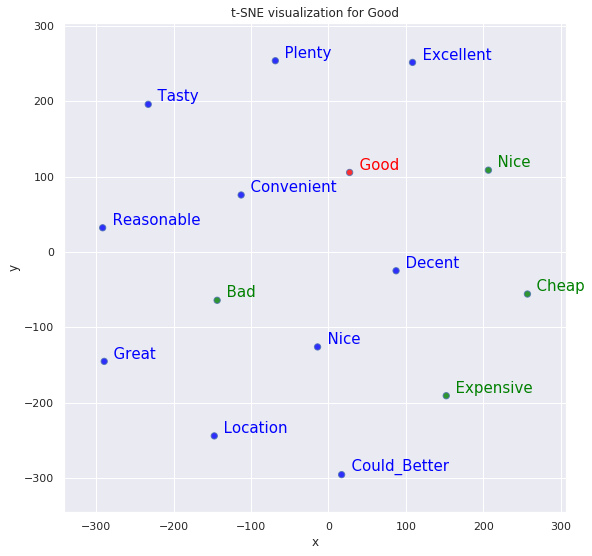

In [166]:
tsnescatterplot(w2v_model, 'good', ['bad', 'expensive', 'cheap', 'nice'])

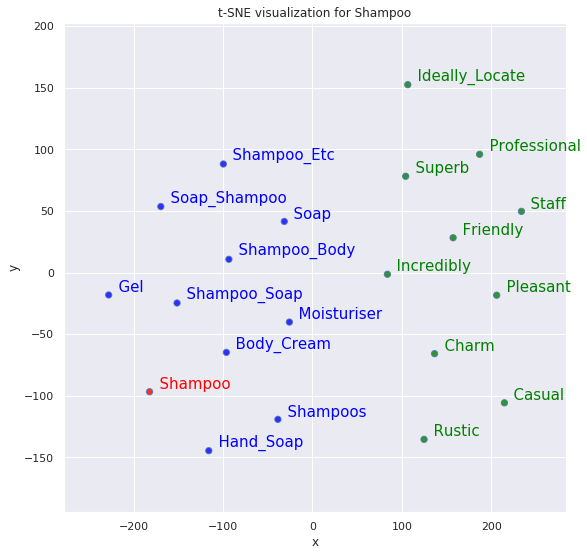

In [167]:
tsnescatterplot(w2v_model, 'shampoo', [i[0] for i in w2v_model.wv.most_similar(negative=["shampoo"])])
# Notare clusters.

In [172]:
import collections
word_freq = collections.defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

72584

In [173]:
import operator
sorted_with_freq = sorted(word_freq.items(),key=operator.itemgetter(1),reverse=True)
sorted_with_freq[:10]

[('room', 391960),
 ('staff', 236778),
 ('hotel', 210312),
 ('location', 204784),
 ('breakfast', 145619),
 ('good', 137900),
 ('negative', 130063),
 ('great', 115926),
 ('bed', 103130),
 ('friendly', 90280)]

In [174]:
v = sorted_with_freq[:10]
for word,freq in v:
    print(word)

room
staff
hotel
location
breakfast
good
negative
great
bed
friendly


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


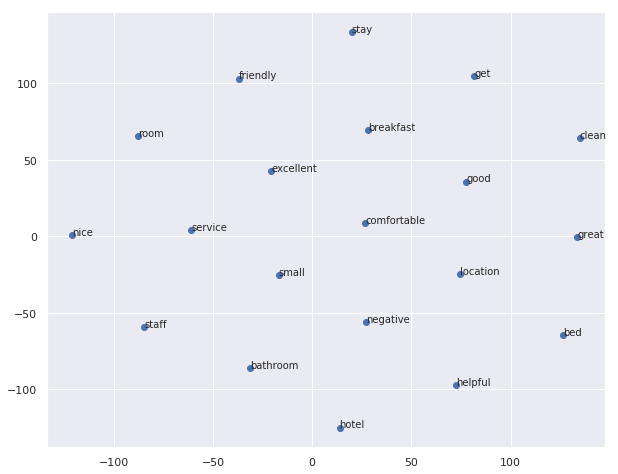

In [176]:
def plot_word(n):
#     vocab = list(w2v_model.wv.vocab)
#     X = w2v_model[vocab]
    X = []
    vocabulary_local = []
    s = sorted_with_freq[:n]
    
    for word,freq in s:
        vec = w2v_model[word]
        X.append(vec)

        vocabulary_local.append(word)
        
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    df = pd.DataFrame(X_tsne, index=vocabulary_local, columns=['x', 'y'])
    fig = plt.figure(figsize=FIG_SIZE)
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos)
    plt.show()
plot_word(20) # Che senso ha il diagramma?

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


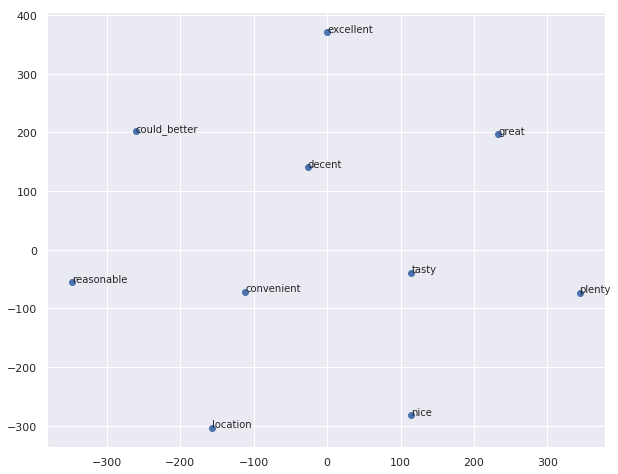

In [177]:
def plot_similar_words(word):
#     vocab = list(w2v_model.wv.vocab)
#     X = w2v_model[vocab]
    X = []
    vocabulary_local = []
    
    s = w2v_model.wv.most_similar(positive=[word])
    
    for word,freq in s:
        vec = w2v_model[word]
        X.append(vec)

        vocabulary_local.append(word)
        
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    df = pd.DataFrame(X_tsne, index=vocabulary_local, columns=['x', 'y'])
    fig = plt.figure(figsize=FIG_SIZE)
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos)
    plt.show()
plot_similar_words('good')

# Section 5: Learning Methods.

## Unsupervised Learning

### K-means clustering with Bag-of-Words

Now that we have found the number of component to use we can move on and try to apply K-Means clustering algorithm on the data. We have another problem, we need to find the value for the hyperparameter, i.e. the number of cluster to use.
We use a method called **elbow method**.
https://www.kaggle.com/thebrownviking20/k-means-clustering-of-1-million-headlines

In [126]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    %time kmeans.fit(X_bow_svd)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_bow.png')
plt.show()

CPU times: user 39.3 s, sys: 7.3 s, total: 46.6 s
Wall time: 26 s
CPU times: user 1min 54s, sys: 17.4 s, total: 2min 11s
Wall time: 1min 54s


KeyboardInterrupt: 

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [ ]:
# Print centroid of each cluster.
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)

http://brandonrose.org/clustering continuare seguendo il link

### K-means clustering with TF-IDF

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    %time kmeans.fit(X_tfidf_svd)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_tfidf.png')
plt.show()

In [ ]:
# Print centroid of each cluster.
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)

### K-means clustering with Word2Vec

CPU times: user 1.45 s, sys: 1.14 s, total: 2.59 s
Wall time: 734 ms
CPU times: user 3.91 s, sys: 2.28 s, total: 6.19 s
Wall time: 2.37 s
CPU times: user 4.33 s, sys: 2.72 s, total: 7.05 s
Wall time: 2.63 s
CPU times: user 5.66 s, sys: 3.11 s, total: 8.77 s
Wall time: 3.56 s
CPU times: user 6.03 s, sys: 3.58 s, total: 9.61 s
Wall time: 4.16 s
CPU times: user 7.17 s, sys: 4.51 s, total: 11.7 s
Wall time: 5 s
CPU times: user 8.08 s, sys: 3.91 s, total: 12 s
Wall time: 5.18 s
CPU times: user 9.06 s, sys: 4.06 s, total: 13.1 s
Wall time: 5.88 s
CPU times: user 9.03 s, sys: 4.43 s, total: 13.5 s
Wall time: 5.64 s
CPU times: user 10.6 s, sys: 4.74 s, total: 15.3 s
Wall time: 7.12 s


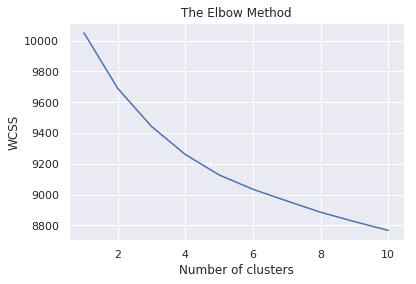

In [189]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    %time kmeans.fit(X_wv)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_word2vec.png')
plt.show()

In [193]:
# From the pic above identify the number of clusters to use.
num_clust = 4
kmeans = KMeans(n_clusters=num_clust)
%time kmeans.fit(X_wv)

CPU times: user 5.71 s, sys: 2.84 s, total: 8.55 s
Wall time: 3.75 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [194]:
# Print centroid of each cluster.
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = list(w2v_model.wv.vocab)
for i in range(num_clust):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 happy
 wonderful
 difficult
 really
 order
 record
 outside
 design
 ask
 elderly
Cluster 1:
 especially
 even
 area
 common
 excellent
 make
 volume
 mistake
 fall_asleep
 best
Cluster 2:
 extreamly
 demand
 property
 pricing
 common
 recommendation
 door
 price
 book
 water
Cluster 3:
 due
 nearby
 elderly
 difficult
 completely
 together
 view
 really
 would
 afraid


## Supervisioned Learning

In [12]:
X_train_counts_bow.shape

(515738, 11716)

In [13]:
X_bow_svd.shape

(515738, 300)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_bow_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [15]:
text_df.head()

,Text,Is_Positive,Clean_Text
0,only the park outside of the hotel was beautif...,0,park outside hotel beautiful angry make post a...
1,no real complaints the hotel was great great l...,1,real complaint hotel great great location surr...
2,location was good and staff were ok it is cute...,1,location good staff ok cute hotel breakfast ra...
3,great location in nice surroundings the bar an...,0,great location nice surroundings bar restauran...
4,amazing location and building romantic setting...,1,amaze location building romantic setting book ...


In [16]:
len(x_train) + len(x_test) == len(y_train) + len(y_test)

True

In [17]:
X_train_counts_bow

<515738x11716 sparse matrix of type '<class 'numpy.int64'>'
	with 8551930 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes with BoW

In [18]:
from sklearn.metrics import confusion_matrix

params = {
    'alpha':[x for x in range(0, 50, 10)]
} 

# Initialize Bayes Classifier.
nb = MultinomialNB()

# We need to tune the alpha parameter, in order to do this we use GridSearchCV.
clf = GridSearchCV(nb, param_grid=params,cv=2)

# N.B. uso X_train_counts_bow perchè svd ha valori negativi.
# https://stackoverflow.com/questions/24169238/dealing-with-negative-values-in-sklearn-multinomialnb
x_train, x_test, y_train, y_test = train_test_split(X_train_counts_bow, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)
    
clf.fit(x_train, y_train)
print("Best param for alpha is {}".format(clf.best_params_))

/home/luigi/.local/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/luigi/.local/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best param for alpha is {'alpha': 20}


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[  3043   6199]
 [  3592 141888]]
Accuracy score: 0.93672


### SVM with LSA on BoW

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X_bow_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [57]:
from sklearn.linear_model import SGDClassifier

parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=3)

clf.fit(x_train, y_train)

print("Best params for SVM are: {}".format(clf.best_params_))

Best params for SVM are: {'alpha': 0.1, 'loss': 'hinge', 'n_jobs': -1, 'penalty': 'l1'}


In [58]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[     0   9242]
 [     0 145480]]
Accuracy score: 0.94027


In [59]:
y_test.value_counts()

1    145480
0      9242
Name: Is_Positive, dtype: int64

In [60]:
pd.Series(y_pred).value_counts()

1    154722
dtype: int64

In [61]:
text_df['Is_Positive'].value_counts()

1    485035
0     30703
Name: Is_Positive, dtype: int64

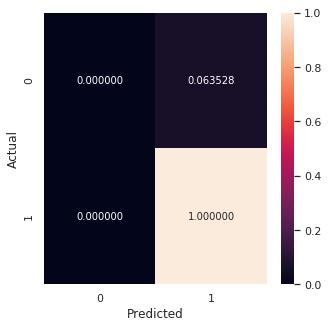

In [62]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Forest Classifier with BoW

In [63]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

/home/luigi/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[  1027   8215]
 [  1705 143775]]
Accuracy score: 0.93589


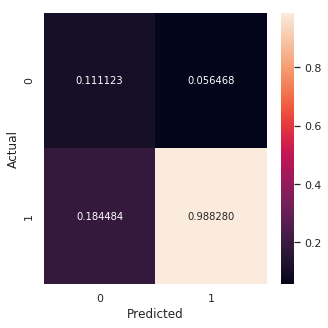

In [65]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Supervised Learning based on TF-IDF

In [94]:
X_train_counts_tfidf.shape

(515738, 11716)

In [95]:
X_tfidf_svd.shape

(515738, 400)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [97]:
text_df.head()

,Text,Is_Positive,Clean_Text
0,only the park outside of the hotel was beautif...,0,park outside hotel beautiful angry make post a...
1,no real complaints the hotel was great great l...,1,real complaint hotel great great location surr...
2,location was good and staff were ok it is cute...,1,location good staff ok cute hotel breakfast ra...
3,great location in nice surroundings the bar an...,0,great location nice surroundings bar restauran...
4,amazing location and building romantic setting...,1,amaze location building romantic setting book ...


In [98]:
len(x_train) + len(x_test) == len(y_train) + len(y_test)

True

In [100]:
X_train_counts_tfidf

<515738x11716 sparse matrix of type '<class 'numpy.float64'>'
	with 8551930 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes with TF-IDF

In [104]:
from sklearn.metrics import confusion_matrix

params = {
    'alpha':[x for x in range(0, 50, 10)]
} 

# Initialize Bayes Classifier.
nb = MultinomialNB()

# We need to tune the alpha parameter, in order to do this we use GridSearchCV.
clf = GridSearchCV(nb, param_grid=params,cv=2)

# N.B. uso X_train_counts_bow perchè svd ha valori negativi.
# https://stackoverflow.com/questions/24169238/dealing-with-negative-values-in-sklearn-multinomialnb
x_train, x_test, y_train, y_test = train_test_split(X_train_counts_tfidf, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)
    
clf.fit(x_train, y_train)
# nb.fit(x_train, y_train)
print("Best param for alpha is {}".format(clf.best_params_))

Best param for alpha is {'alpha': 0}


In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[   964   8278]
 [   510 144970]]
Accuracy score: 0.94320


### SVM with LSA on TF-IDF

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [107]:
from sklearn.linear_model import SGDClassifier

parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=3)

clf.fit(x_train, y_train)

print("Best params for SVM are: {}".format(clf.best_params_))

Best params for SVM are: {'alpha': 0.1, 'loss': 'hinge', 'n_jobs': -1, 'penalty': 'l1'}


In [109]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[     0   9242]
 [     0 145480]]
Accuracy score: 0.94027


In [110]:
y_test.value_counts()

1    145480
0      9242
Name: Is_Positive, dtype: int64

In [111]:
pd.Series(y_pred).value_counts()

1    154722
dtype: int64

In [112]:
text_df['Is_Positive'].value_counts()

1    485035
0     30703
Name: Is_Positive, dtype: int64

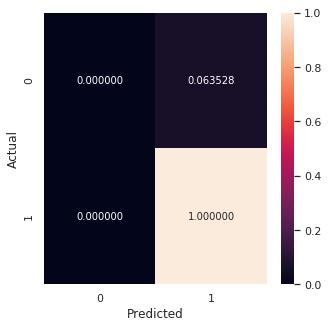

In [113]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Forest Classifier with TF-IDF

In [114]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [115]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[   973   8269]
 [  1665 143815]]
Accuracy score: 0.93579


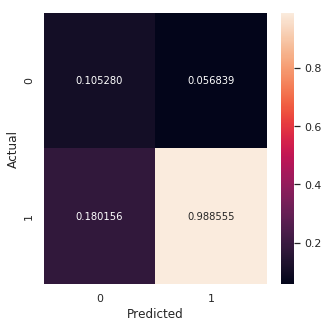

In [116]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Supervised Learning based on Word2Vec

### Multinomial Naive Bayes with Word2Vec

In [186]:
from sklearn.metrics import confusion_matrix

params = {
    'alpha':[x for x in range(0, 50, 10)]
} 

# Initialize Bayes Classifier.
nb = MultinomialNB()

# We need to tune the alpha parameter, in order to do this we use GridSearchCV.
clf = GridSearchCV(nb, param_grid=params,cv=2)

# N.B. uso X_train_counts_bow perchè svd ha valori negativi.
# https://stackoverflow.com/questions/24169238/dealing-with-negative-values-in-sklearn-multinomialnb
x_train, x_test, y_train, y_test = train_test_split(X_wv, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)
    
clf.fit(x_train, y_train)
# nb.fit(x_train, y_train)
print("Best param for alpha is {}".format(clf.best_params_))

ValueError: Found input variables with inconsistent numbers of samples: [10153, 515738]

# Section X: Recommendation system based on tags.

In [127]:
tags_recom = text_df.copy()
tags_recom.head()

,Text,Is_Positive,Clean_Text
0,only the park outside of the hotel was beautif...,0,park outside hotel beautiful angry make post a...
1,no real complaints the hotel was great great l...,1,real complaint hotel great great location surr...
2,location was good and staff were ok it is cute...,1,location good staff ok cute hotel breakfast ra...
3,great location in nice surroundings the bar an...,0,great location nice surroundings bar restauran...
4,amazing location and building romantic setting...,1,amaze location building romantic setting book ...


In [118]:
tags_recom['Tags'] = reviews_df['Tags']
tags_recom['Hotel_Name'] = reviews_df['Hotel_Name']
tags_recom.head()

,Text,Is_Positive,Clean_Text,Tags,Hotel_Name
0,only the park outside of the hotel was beautif...,0,park outside hotel beautiful angry make post a...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Hotel Arena
1,no real complaints the hotel was great great l...,1,real complaint hotel great great location surr...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Hotel Arena
2,location was good and staff were ok it is cute...,1,location good staff ok cute hotel breakfast ra...,"[' Leisure trip ', ' Family with young childre...",Hotel Arena
3,great location in nice surroundings the bar an...,0,great location nice surroundings bar restauran...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Hotel Arena
4,amazing location and building romantic setting...,1,amaze location building romantic setting book ...,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Hotel Arena


In [119]:
hotelLeisureCounts = tags_recom[tags_recom['Tags'].str.contains('Leisure')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("BusinessCounts: ", len(hotelLeisureCounts))

hotelBusinessCounts = tags_recom[tags_recom['Tags'].str.contains('Business')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Leisure Counts: ",len(hotelBusinessCounts))

hotelSoloCounts = tags_recom[tags_recom['Tags'].str.contains('Solo')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Solo Traveller Counts: ",len(hotelSoloCounts))

hotelCoupleCounts = tags_recom[tags_recom['Tags'].str.contains('Couple')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Solo Couple Counts: ",len(hotelCoupleCounts))

hotelGroupCounts = tags_recom[tags_recom['Tags'].str.contains('Group')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Solo Group Counts: ",len(hotelGroupCounts))

BusinessCounts:  1492
Leisure Counts:  1488
Solo Traveller Counts:  1491
Solo Couple Counts:  1492
Solo Group Counts:  1481


In [120]:
tags_recom = pd.DataFrame(index = tags_recom['Hotel_Name'].unique().tolist())
tags_recom.head()

""
Hotel Arena
K K Hotel George
Apex Temple Court Hotel
The Park Grand London Paddington
Monhotel Lounge SPA


In [121]:
tags_recom['Business']=0;
tags_recom['Leisure']=0;
tags_recom['Solo']=0;
tags_recom['Couple']=0;
tags_recom['Group']=0;
tags_recom.head()

,Business,Leisure,Solo,Couple,Group
Hotel Arena,0,0,0,0,0
K K Hotel George,0,0,0,0,0
Apex Temple Court Hotel,0,0,0,0,0
The Park Grand London Paddington,0,0,0,0,0
Monhotel Lounge SPA,0,0,0,0,0


In [122]:
for hotel in reviews_df['Hotel_Name'].unique().tolist():
    if hotel in hotelBusinessCounts and hotel in hotelLeisureCounts:
        if hotelLeisureCounts[hotel] > hotelBusinessCounts[hotel]:
            tags_recom.at[hotel, 'Leisure'] = 1
        elif hotelLeisureCounts[hotel] < hotelBusinessCounts[hotel]:
            tags_recom.at[hotel, 'Business'] = 1
        else:
            tags_recom.at[hotel, 'Leisure'] = 1
            tags_recom.at[hotel, 'Business'] = 1
    elif hotel in hotelBusinessCounts and hotel not in hotelLeisureCounts:
        tags_recom.at[hotel, 'Business'] = 1
    elif hotel in hotelLeisureCounts and hotel not in hotelBusinessCounts:
        #print ("no business tag reviews for: ",hotel)
        tags_recom.at[hotel, 'Leisure'] = 1
        
    #Update Traveller type columns
    #print hotelCoupleCounts['Best Western Amiral Hotel']
    if hotel in hotelSoloCounts and hotel in hotelCoupleCounts and hotel in hotelGroupCounts:
        soloCount=hotelSoloCounts[hotel]
        coupleCount=hotelCoupleCounts[hotel]
        groupCount=hotelGroupCounts[hotel]

        if soloCount>coupleCount and soloCount>groupCount:
            tags_recom.at[hotel, 'Solo'] = 1
        elif coupleCount>soloCount and coupleCount>groupCount:
            tags_recom.at[hotel, 'Couple'] = 1
        elif groupCount>soloCount and groupCount>coupleCount:
            tags_recom.at[hotel, 'Group'] = 1
        elif soloCount==coupleCount and soloCount>groupCount:
            tags_recom.at[hotel, 'Solo'] = 1
            tags_recom.at[hotel, 'Couple'] = 1
        elif soloCount==groupCount and soloCount>coupleCount:
            tags_recom.at[hotel, 'Solo'] = 1
            tags_recom.at[hotel, 'Group'] = 1
        elif coupleCount==groupCount and coupleCount>soloCount:
            tags_recom.at[hotel, 'Couple'] = 1
            tags_recom.at[hotel, 'Group'] = 1
        else:
            tags_recom.at[hotel, 'Solo'] = 1
            tags_recom.at[hotel, 'Couple'] = 1
            tags_recom.at[hotel, 'Group'] = 1
    
tags_recom

,Business,Leisure,Solo,Couple,Group
Hotel Arena,0,1,0,1,0
K K Hotel George,0,1,0,1,0
Apex Temple Court Hotel,0,1,0,1,0
The Park Grand London Paddington,0,1,0,1,0
Monhotel Lounge SPA,0,1,0,1,0
Kube Hotel Ice Bar,0,1,0,1,0
The Principal London,0,1,0,1,0
Park Plaza County Hall London,0,1,0,1,0
One Aldwych,0,1,0,1,0
Splendid Etoile,0,1,0,1,0


In [123]:
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

userDF= pd.DataFrame(index=['user'],columns=['Business','Leisure','Solo','Couple','Group'])
userDF.loc['user'] = [0,1,0,1,0]
userDF

,Business,Leisure,Solo,Couple,Group
user,0,1,0,1,0


In [124]:
similarityDF=cosine_similarity(tags_recom,userDF)
similarityDF = pd.DataFrame(similarityDF)
#Update similarity dataframe to add the average score column
similarityDF['Average_Score']=0.0;

for index, row in similarityDF.iterrows():
    #Get the hotel row from original dataframe
    hotelRow= reviews_df.loc[reviews_df['Hotel_Name'] == tags_recom.index[index]].head(1)
    #Update score column
    similarityDF.at[index, 'Average_Score'] = hotelRow['Average_Score']

#Sort similarityDF by cosine similarity score and then hotel average score
similarityDF=similarityDF.sort_values(by=[0,'Average_Score'],ascending=False).head(5)
for index, row in similarityDF.iterrows():
    print ("Hotel Name: ", tags_recom.index[index])
    hotelRow= reviews_df.loc[reviews_df['Hotel_Name'] == tags_recom.index[index]].head(1)
    print ("Average Score: ", hotelRow['Average_Score'])
    print (tags_recom.iloc[index])
    print ('Similarity score',row[0])
    print ('\n')


Hotel Name:  Haymarket Hotel
Average Score:  14708    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: Haymarket Hotel, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  H tel de La Tamise Esprit de France
Average Score:  176997    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: H tel de La Tamise Esprit de France, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  41
Average Score:  185602    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: 41, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  Hotel Casa Camper
Average Score:  316447    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: Hotel Casa Camper, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  Hotel The Serr

## Sentiment Analysis

In [178]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/luigi/nltk_data...


True

In [200]:
sid = SentimentIntensityAnalyzer()
text_df['Neg'] = 0.0
text_df['Neu'] = 0.0
text_df['Pos'] = 0.0
text_df['Comp'] = 0.0

for index, row in text_df.iterrows():
    result = sid.polarity_scores(row['Clean_Text'])
    text_df.at[index,'Neg'] = result['neg']
    text_df.at[index,'Neu'] = result['neu']
    text_df.at[index,'Pos'] = result['pos']
    text_df.at[index,'Comp'] = result['compound']

In [217]:
text_df.head()

,Text,Is_Positive,Clean_Text,Neg,Neu,Pos,Comp
0,only the park outside of the hotel was beautif...,0,park outside hotel beautiful angry make post a...,0.114,0.780,0.105,0.0609
1,no real complaints the hotel was great great l...,1,real complaint hotel great great location surr...,0.136,0.591,0.273,0.9325
2,location was good and staff were ok it is cute...,1,location good staff ok cute hotel breakfast ra...,0.098,0.591,0.311,0.8555
3,great location in nice surroundings the bar an...,0,great location nice surroundings bar restauran...,0.204,0.572,0.224,0.5121
4,amazing location and building romantic setting...,1,amaze location building romantic setting book ...,0.082,0.711,0.206,0.8979


Per misurare qualità classificatore ottenuto [link](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a).